# Training a model
To train the initial model, please refer to `./model_training/train.ipynb`\
To get the testing examples to pass to the metric, please refer to `./model_training/test_dataset.ipynb`

# Results Analysis
In this file I will analyse the results obtained from my metric.

I got 10 examples per type, I will explain this more ahead. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

We will start by loading all data from the csv files

In [ ]:
MEASURES_PATH = "../tests/data/measures"
# Lime

# Normal Examples
well_classified_lime_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-well_classified-lime.csv").drop(columns=["feature_pid"])
wrongly_classified_lime_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-wrongly_classified-lime.csv").drop(columns=["feature_pid"])

# Display LIME normal examples side by side
lime_normal_comparison = pd.concat([
    well_classified_lime_examples.describe().add_prefix('Well_'),
    wrongly_classified_lime_examples.describe().add_prefix('Wrongly_')
], axis=1)
display(lime_normal_comparison)

# Adversarial Examples
original_adv_examples_lime_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-original_adv_examples-lime.csv").drop(columns=["feature_pid"])
adv_examples_lime_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-adv_examples-lime.csv").drop(columns=["feature_pid"])

# Display LIME adversarial examples side by side
lime_adv_comparison = pd.concat([
    original_adv_examples_lime_examples.describe().add_prefix('Original_'),
    adv_examples_lime_examples.describe().add_prefix('Adversarial_')
], axis=1)
display(lime_adv_comparison)


# Saliency

# Normal Examples
well_classified_saliency_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-well_classified-saliency.csv").drop(columns=["feature_pid"])
wrongly_classified_saliency_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-wrongly_classified-saliency.csv").drop(columns=["feature_pid"])

# Display Saliency normal examples side by side
saliency_normal_comparison = pd.concat([
    well_classified_saliency_examples.describe().add_prefix('Well_'),
    wrongly_classified_saliency_examples.describe().add_prefix('Wrongly_')
], axis=1)
display(saliency_normal_comparison)

# Adversarial Examples
original_adv_examples_saliency_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-original_adv_examples-saliency.csv").drop(columns=["feature_pid"])
adv_examples_saliency_examples = pd.read_csv(
    f"{MEASURES_PATH}/local_lipschitz_estimate-adv_examples-saliency.csv").drop(columns=["feature_pid"])

# Display Saliency adversarial examples side by side
saliency_adv_comparison = pd.concat([
    original_adv_examples_saliency_examples.describe().add_prefix('Original_'),
    adv_examples_saliency_examples.describe().add_prefix('Adversarial_')
], axis=1)
display(saliency_adv_comparison)

,Well_score,Wrongly_score
count,10.000000,10.000000
mean,1.288382,1.519274
std,0.394123,0.298447
min,0.876816,0.987743
25%,1.017316,1.410182
50%,1.161835,1.549343
75%,1.492477,1.714221
max,2.177134,2.001801


,Original_score,Adversarial_score
count,10.000000,10.000000
mean,1.509102,1.213720
std,0.224331,0.310670
min,1.133217,0.862408
25%,1.307482,0.967661
50%,1.576158,1.132072
75%,1.671974,1.427356
max,1.806631,1.809305


,Well_score,Wrongly_score
count,10.000000,10.000000
mean,0.794847,1.017735
std,0.173527,0.251910
min,0.554992,0.718673
25%,0.646505,0.867569
50%,0.823819,1.003660
75%,0.859848,1.071640
max,1.136792,1.569778


,Original_score,Adversarial_score
count,10.000000,10.000000
mean,0.774525,0.831759
std,0.131941,0.197609
min,0.562175,0.528792
25%,0.699599,0.696293
50%,0.759977,0.827020
75%,0.827772,1.016835
max,1.005697,1.086542


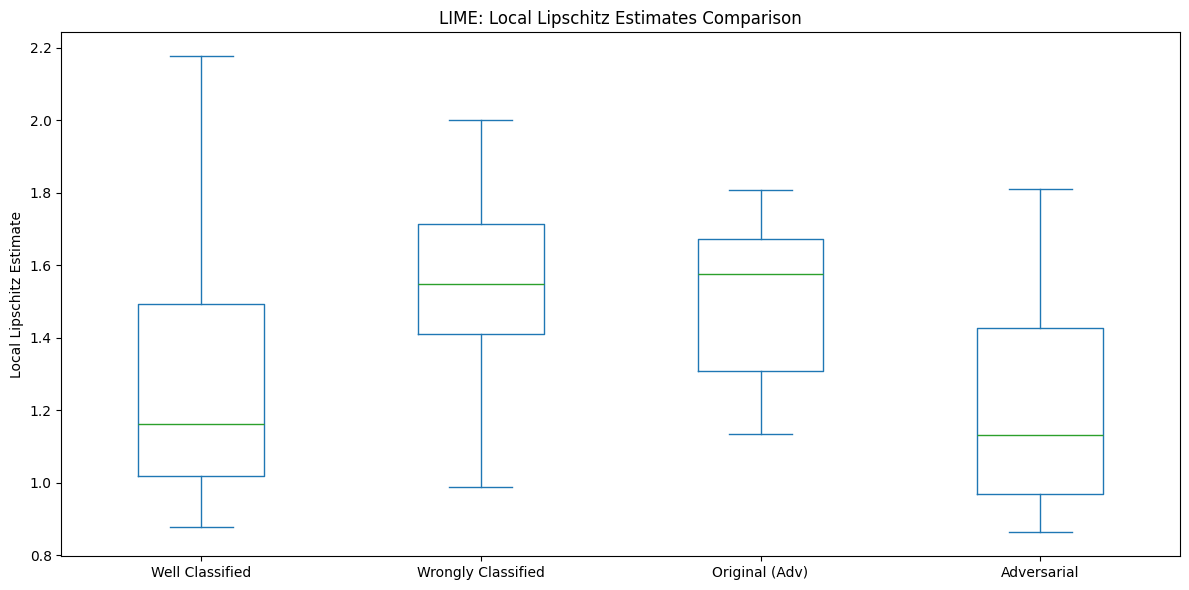

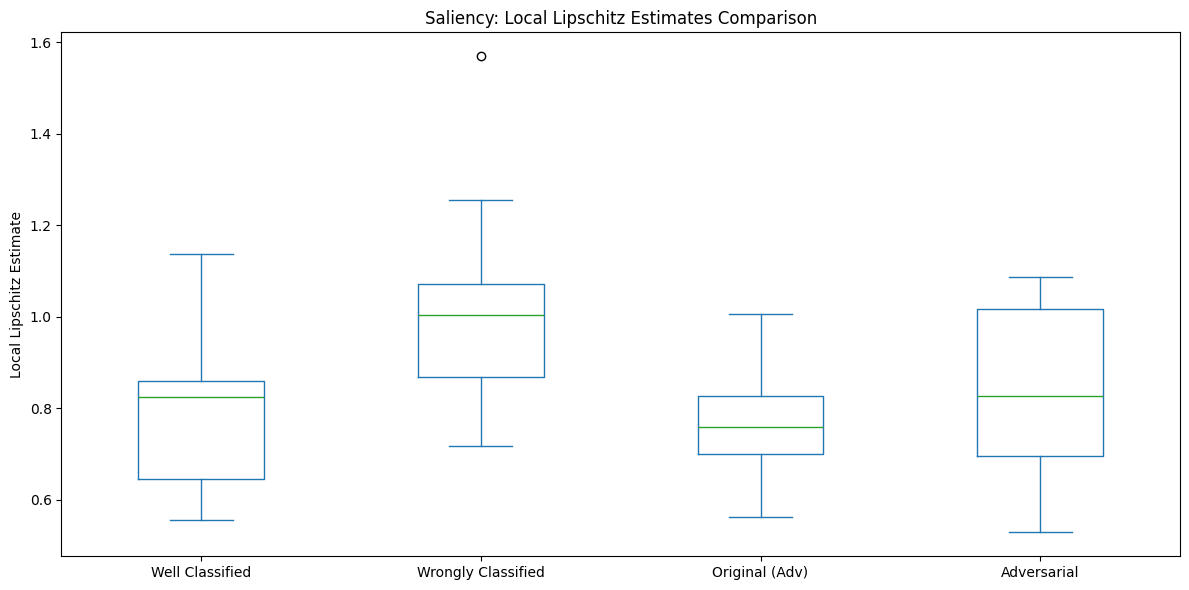

In [11]:
# LIME - All 4 comparisons on one graph
lime_combined_data = pd.DataFrame({
    'Well Classified': well_classified_lime_examples['score'],
    'Wrongly Classified': wrongly_classified_lime_examples['score'],
    'Original (Adv)': original_adv_examples_lime_examples['score'],
    'Adversarial': adv_examples_lime_examples['score']
})
lime_combined_data.plot(kind='box', figsize=(12, 6), title='LIME: Local Lipschitz Estimates Comparison', ylabel='Local Lipschitz Estimate')
plt.tight_layout()
plt.show()

# Saliency - All 4 comparisons on one graph
saliency_combined_data = pd.DataFrame({
    'Well Classified': well_classified_saliency_examples['score'],
    'Wrongly Classified': wrongly_classified_saliency_examples['score'],
    'Original (Adv)': original_adv_examples_saliency_examples['score'],
    'Adversarial': adv_examples_saliency_examples['score']
})
saliency_combined_data.plot(kind='box', figsize=(12, 6), title='Saliency: Local Lipschitz Estimates Comparison', ylabel='Local Lipschitz Estimate')
plt.tight_layout()
plt.show()

## Results analysis

Before analysing the results we have to understand what is this metric about. \\
This metric analyse how stable a specific explainability function (EF) is, this is, starting with some examples, their classifications and their explanations given by the EF, how stable are they when we perturb the inputs slightly by a certain noise?

This metric then allows us to deduce whether we are choosing the right explanation function or not, and if we are not, we could redo this analysis using different functions until the one that explains the user how a decision was made in a way that slight disturbances to it still yield the same results.

This is especially important in the field of cybersecurity because creating robust models is a must when they are exposed to the public, in some way or another, such that if an attack is ever successful, instead on hoping that some fix works, like simply adversarial training (which sometimes is uneffective), we can understand what needs to be tweaked and how, to guarantee that this attack vector is minimized in the future.

### How to read the metric
The output of LocalLipschitzEstimate is a score where lower is better. A low score means the explanation changes very little when the input is perturbed, indicating high stability.


### Analysis

By analysing the data obtained, we can see that theres a wide diversity of values of the LLE. It appears that the explainability function is not completely stable, however it should be noted that this result could be due to the low amount of examples used to analyse the explainability function.

When looking at the LLE values for the Saliency metric, we can clearly notice that there's a smaller variance in them, which can be understood that Saliency is more stable around its explanations.

One good thing to look at, is at the stability of LIME under adversarial examples. I consider LIME's stability under deviations from adversarial examples especially confusing, given that these examples are close to the border between being well classified and missclassified, this result could be possibly explained by looking at the radius of perturbation from LLE, which is set at 1/4 of the std of the pixel values. Perhaps this perturbation radius is small enough compared to the perturbation made by the attack.
Nonetheless, we do see a slight increase of instability in the LLE of these examples, as the LLE  on the examples previous to the attack had a tighter variance, but an lower average LLE, givint the idea that it could be less unstable.

When looking at LLE metric using Saliency explanation function, we do see an overall improvement, this could be due to this evaluation function being more simple but not as robust as LIME. As, even though, the stability of the metric could be lower than LIME, it does not evaluate the effectiveness of the metric itself, just that its explanations are robust against small deviations.
In this configuration of the metric, we do see a slighht detriment to the stability when evaluated with some examples and their adversarial examples, however it could be a neglectable difference.